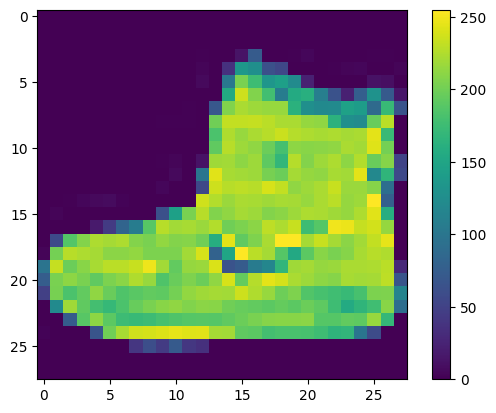

In [1]:
# TensorFlow and tf.keras
import tensorflow as tf

# Helper libraries
import numpy as np
import matplotlib.pyplot as plt

fashion_mnist = tf.keras.datasets.fashion_mnist

(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

plt.figure()
plt.imshow(train_images[0])
plt.colorbar()
plt.grid(False)
plt.show()

train_images = train_images / 255.0

test_images = test_images / 255.0

In [2]:
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.optimizers import Adam


model = tf.keras.Sequential()
model.add(tf.keras.layers.Conv2D(32, (3, 3), padding="same", activation="relu", input_shape=(28, 28, 1)))
model.add(tf.keras.layers.MaxPooling2D((2, 2)))

model.add(tf.keras.layers.Conv2D(256*3, (3, 3), activation="relu"))
model.add(tf.keras.layers.MaxPooling2D((2, 2)))

model.add(tf.keras.layers.Conv2D(256, (3, 3), activation="relu"))

model.add(tf.keras.layers.Flatten())
model.add(tf.keras.layers.Dense(128, activation="relu"))

model.add(tf.keras.layers.Dense(10, activation="softmax"))

model.compile(optimizer=Adam(learning_rate=0.0003),
                  loss='sparse_categorical_crossentropy',
                  metrics=['accuracy'])


early_stopping = EarlyStopping(monitor='val_loss', patience=3, restore_best_weights=True)

In [3]:
model.fit(train_images, train_labels, epochs=400, batch_size=64, validation_split=0.2, callbacks=[early_stopping])

Epoch 1/400
750/750 [==============================] - 20s 14ms/step - loss: 0.4990 - accuracy: 0.8203 - val_loss: 0.3542 - val_accuracy: 0.8695
Epoch 2/400
750/750 [==============================] - 9s 12ms/step - loss: 0.3026 - accuracy: 0.8915 - val_loss: 0.2850 - val_accuracy: 0.8983
Epoch 3/400
750/750 [==============================] - 9s 13ms/step - loss: 0.2531 - accuracy: 0.9074 - val_loss: 0.2576 - val_accuracy: 0.9083
Epoch 4/400
750/750 [==============================] - 9s 12ms/step - loss: 0.2181 - accuracy: 0.9199 - val_loss: 0.2661 - val_accuracy: 0.9010
Epoch 5/400
750/750 [==============================] - 9s 11ms/step - loss: 0.1930 - accuracy: 0.9302 - val_loss: 0.2368 - val_accuracy: 0.9141
Epoch 6/400
750/750 [==============================] - 9s 12ms/step - loss: 0.1699 - accuracy: 0.9390 - val_loss: 0.2177 - val_accuracy: 0.9216
Epoch 7/400
750/750 [==============================] - 9s 12ms/step - loss: 0.1464 - accuracy: 0.9474 - val_loss: 0.2171 - val_accuracy

313/313 - 1s - loss: 0.2230 - accuracy: 0.9249 - 1s/epoch - 4ms/step

Test accuracy: 0.9248999953269958
313/313 [==============================] - 1s 2ms/step


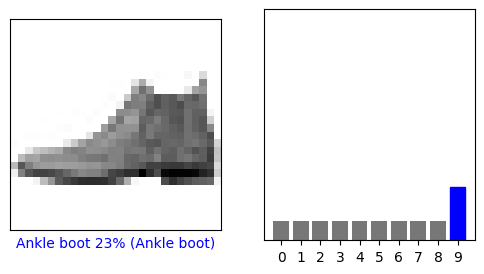

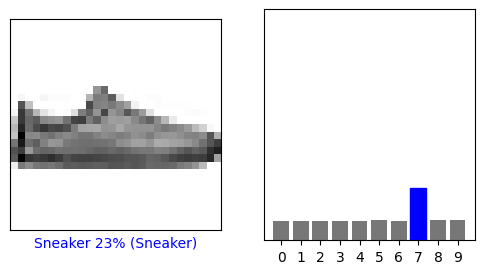

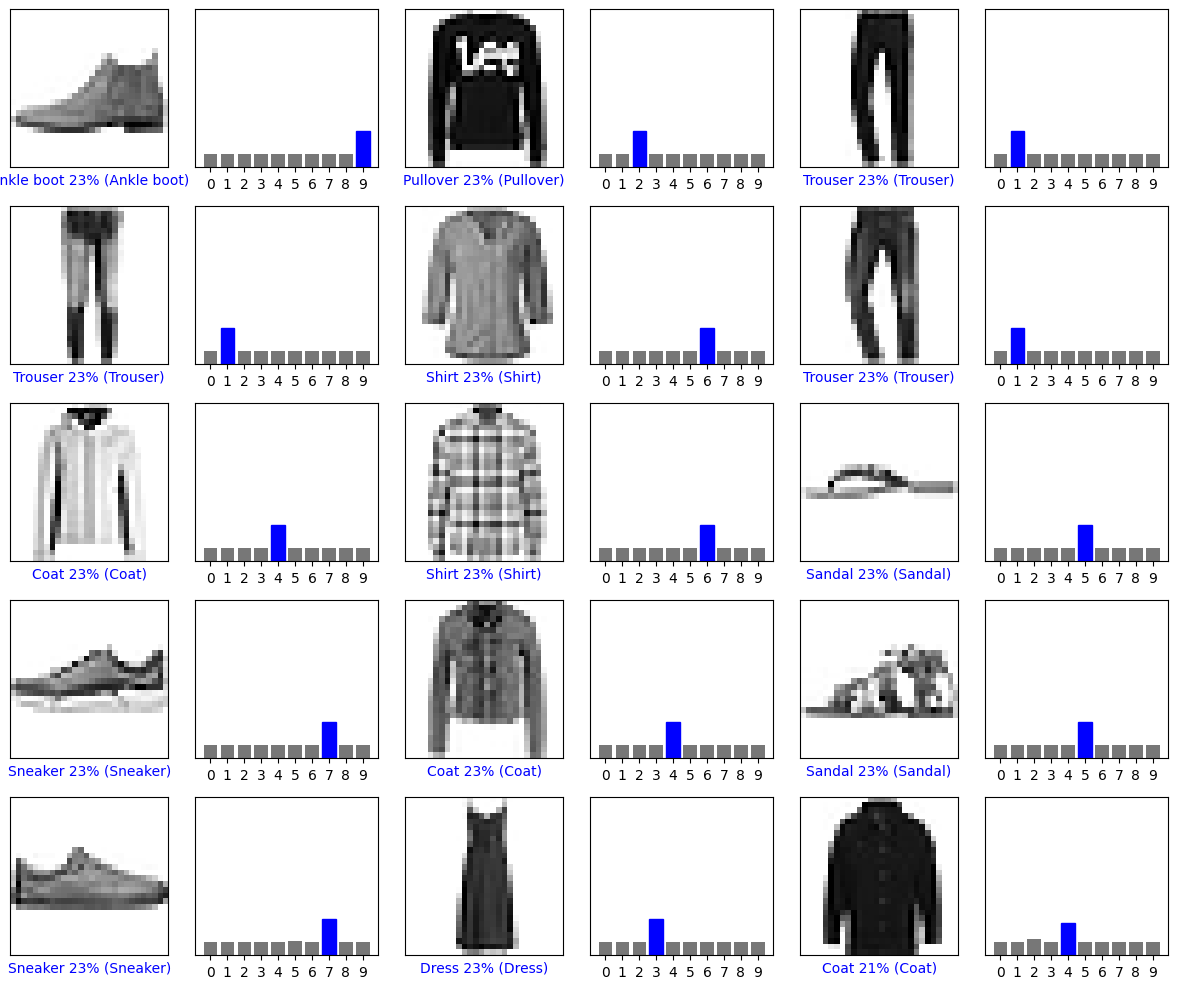

(28, 28)
(1, 28, 28)
1/1 [==============================] - 0s 122ms/step
[[0.08535653 0.08534189 0.2318882  0.08534309 0.08535162 0.08534187
  0.08535113 0.08534187 0.08534188 0.08534188]]


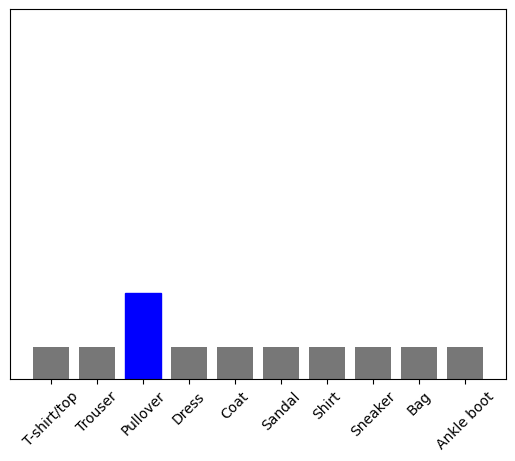

2

In [4]:
test_loss, test_acc = model.evaluate(test_images,  test_labels, verbose=2)

print('\nTest accuracy:', test_acc)

probability_model = tf.keras.Sequential([model,
                                         tf.keras.layers.Softmax()])

predictions = probability_model.predict(test_images)

predictions[0]

np.argmax(predictions[0])

def plot_image(i, predictions_array, true_label, img):
  true_label, img = true_label[i], img[i]
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])

  plt.imshow(img, cmap=plt.cm.binary)

  predicted_label = np.argmax(predictions_array)
  if predicted_label == true_label:
    color = 'blue'
  else:
    color = 'red'

  plt.xlabel("{} {:2.0f}% ({})".format(class_names[predicted_label],
                                100*np.max(predictions_array),
                                class_names[true_label]),
                                color=color)

def plot_value_array(i, predictions_array, true_label):
  true_label = true_label[i]
  plt.grid(False)
  plt.xticks(range(10))
  plt.yticks([])
  thisplot = plt.bar(range(10), predictions_array, color="#777777")
  plt.ylim([0, 1])
  predicted_label = np.argmax(predictions_array)

  thisplot[predicted_label].set_color('red')
  thisplot[true_label].set_color('blue')

i = 0
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, predictions[i], test_labels, test_images)
plt.subplot(1,2,2)
plot_value_array(i, predictions[i],  test_labels)
plt.show()

i = 12
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, predictions[i], test_labels, test_images)
plt.subplot(1,2,2)
plot_value_array(i, predictions[i],  test_labels)
plt.show()

# Plot the first X test images, their predicted labels, and the true labels.
# Color correct predictions in blue and incorrect predictions in red.
num_rows = 5
num_cols = 3
num_images = num_rows*num_cols
plt.figure(figsize=(2*2*num_cols, 2*num_rows))
for i in range(num_images):
  plt.subplot(num_rows, 2*num_cols, 2*i+1)
  plot_image(i, predictions[i], test_labels, test_images)
  plt.subplot(num_rows, 2*num_cols, 2*i+2)
  plot_value_array(i, predictions[i], test_labels)
plt.tight_layout()
plt.show()

# Grab an image from the test dataset.
img = test_images[1]

print(img.shape)

# Add the image to a batch where it's the only member.
img = (np.expand_dims(img,0))

print(img.shape)

predictions_single = probability_model.predict(img)

print(predictions_single)

plot_value_array(1, predictions_single[0], test_labels)
_ = plt.xticks(range(10), class_names, rotation=45)
plt.show()

np.argmax(predictions_single[0])